# Original file is located at
    https://colab.research.google.com/drive/1i9KYqQ6kPkjmUOF1nUh8EWBL2WR0vzcQ

## You can go to the link, copy, and run it there.

In [ ]:
# list library yang digunakan
from google.colab.patches import cv2_imshow as imshow
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [ ]:
# !wget 'https://1.bp.blogspot.com/-1wb03KPrTMM/Upgg4l3Jp-I/AAAAAAAAA4s/0Xhc-21ct2Q/s1600/SelamatHariNatalDanTahunBaru-PianoVersion.jpg' -O xmas.jpg
# !wget 'https://3.bp.blogspot.com/-3GZqC_D3roM/WB14nGym9MI/AAAAAAAANhA/uyMc8AzefJYWtPs__N51WhNX5LzaXa91QCLcB/s1600/Not%2BAngka%2BPianika%2BLagu%2BCitra%2BScholastika%2BAku%2BPasti%2BBisa.png' -O partitur2.jpg
!wget 'https://4.bp.blogspot.com/-a2Xi4wLw1og/TtMdlTGBLDI/AAAAAAAAAhU/W4yFe2NCULw/s1600/dingdongdingv2.jpg' -O partitur3.jpg

In [ ]:
# !gdown '1IGsSBdFN6CwzQURzrdAU3Lh39k5pQtvK' -O citra_part.jpg

## Function

In [ ]:
# resize
def resize(img, scale):
  scale_percent = scale # percent of original size
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
    
  # resize image
  img_resized = cv.resize(img, dim, interpolation = cv.INTER_AREA)
  return img_resized

In [ ]:
def line_segment(img, v_pixel):
  temp = img.copy()
  img_gray = cv.cvtColor(temp, cv.COLOR_BGR2GRAY)
  ret, thresh2 = cv.threshold(img_gray, 150, 255, cv.THRESH_BINARY_INV)
  kernel = cv.getStructuringElement(cv.MORPH_RECT, (img.shape[1],v_pixel))
  mask = cv.morphologyEx(thresh2, cv.MORPH_DILATE, kernel)

  # bboxes = []
  bboxes_img = temp.copy()
  contours = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
  contours = contours[0] if len(contours) == 2 else contours[1]
  for i, cntr in enumerate(contours[::-1]):
      x,y,w,h = cv.boundingRect(cntr)
      cv.rectangle(bboxes_img, (x, y), (x+w, y+h), (0,0,255), 1)
      crop = bboxes_img[y:y+h, x:x+w]
      cv.imwrite(f'S_{i}.jpg', crop)
      print(f'crop{i}:')
      imshow(crop)
      # bboxes.append((x,y,w,h))

  return bboxes_img

In [ ]:
def thinning(img_gray):
  temp = cv.bitwise_not(img_gray.copy())
  # Structuring Element
  kernel = cv.getStructuringElement(cv.MORPH_CROSS,(3,3))
  # Create an empty output image to hold values
  thin = np.zeros(temp.shape,dtype='uint8')

  # Loop until erosion leads to an empty set
  while (cv.countNonZero(temp)!=0):
      # Erosion
      erode = cv.erode(temp,kernel)
      # Opening on eroded image
      opening = cv.morphologyEx(erode,cv.MORPH_OPEN,kernel)
      # Subtract these two
      subset = erode - opening
      # Union of all previous sets
      thin = cv.bitwise_or(subset,thin)
      # Set the eroded image for next iteration
      temp = erode.copy()

  return cv.bitwise_not(thin)

In [ ]:
def show_histogram(img_gray):
  histogram = cv.calcHist([img_gray], [0], None, [256], [0, 256])
  plt.plot(histogram, color='k')
  plt.ylim(0,10000)
  plt.show()

## Main

original image


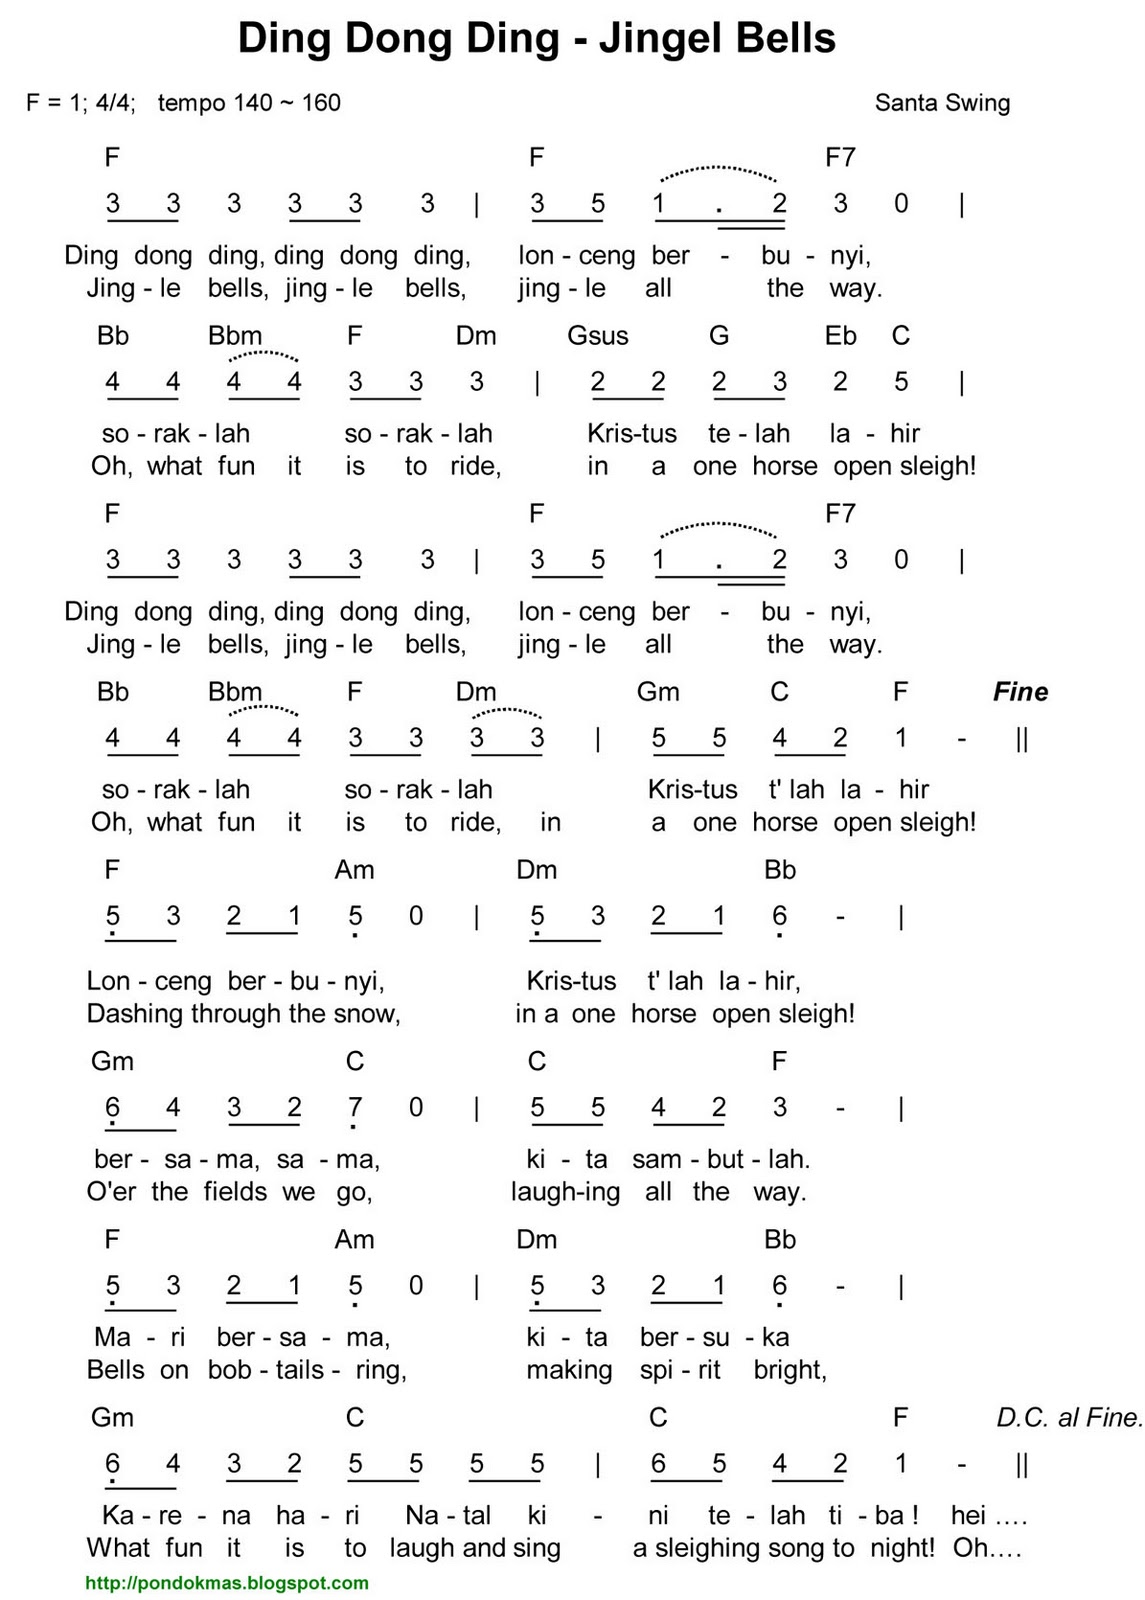

In [ ]:
img = cv.imread('partitur3.jpg')
# img = resize(img, 50)
print('original image')
imshow(img)

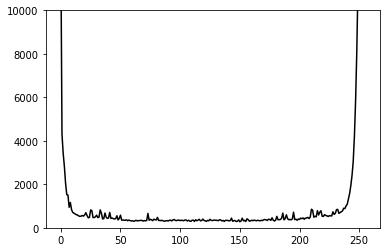

In [ ]:
show_histogram(img)


processing image:
crop0:


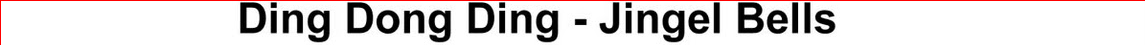

crop1:


crop2:


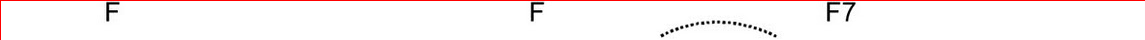

crop3:


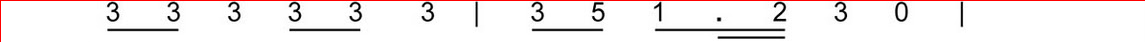

crop4:


crop5:


crop6:


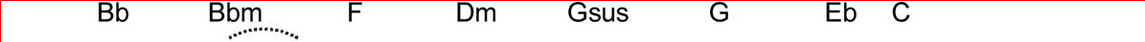

crop7:


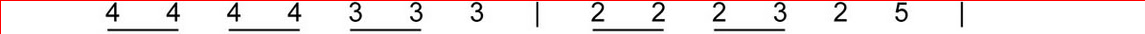

crop8:


crop9:


crop10:


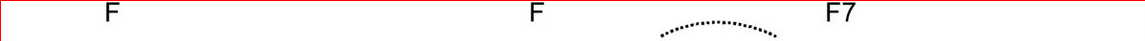

crop11:


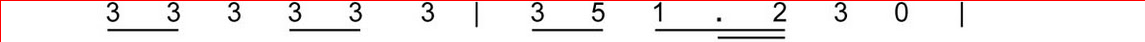

crop12:


crop13:


crop14:


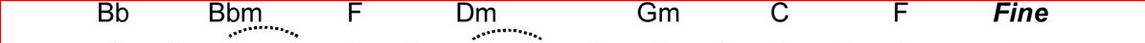

crop15:


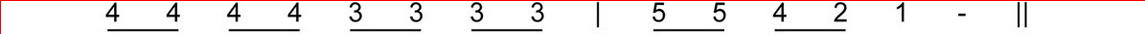

crop16:


crop17:


crop18:


crop19:


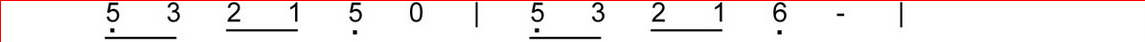

crop20:


crop21:


crop22:


crop23:


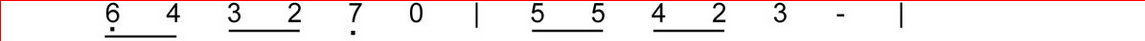

crop24:


crop25:


crop26:


crop27:


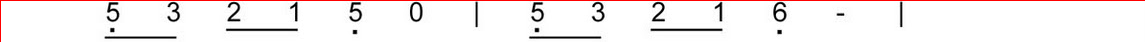

crop28:


crop29:


crop30:


crop31:


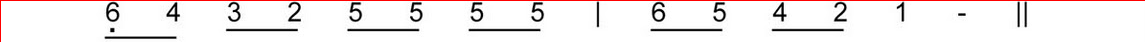

crop32:


crop33:


crop34:


In [ ]:
print('\nprocessing image:')
img_segmented = line_segment(img, 6)


all output of segmented image:


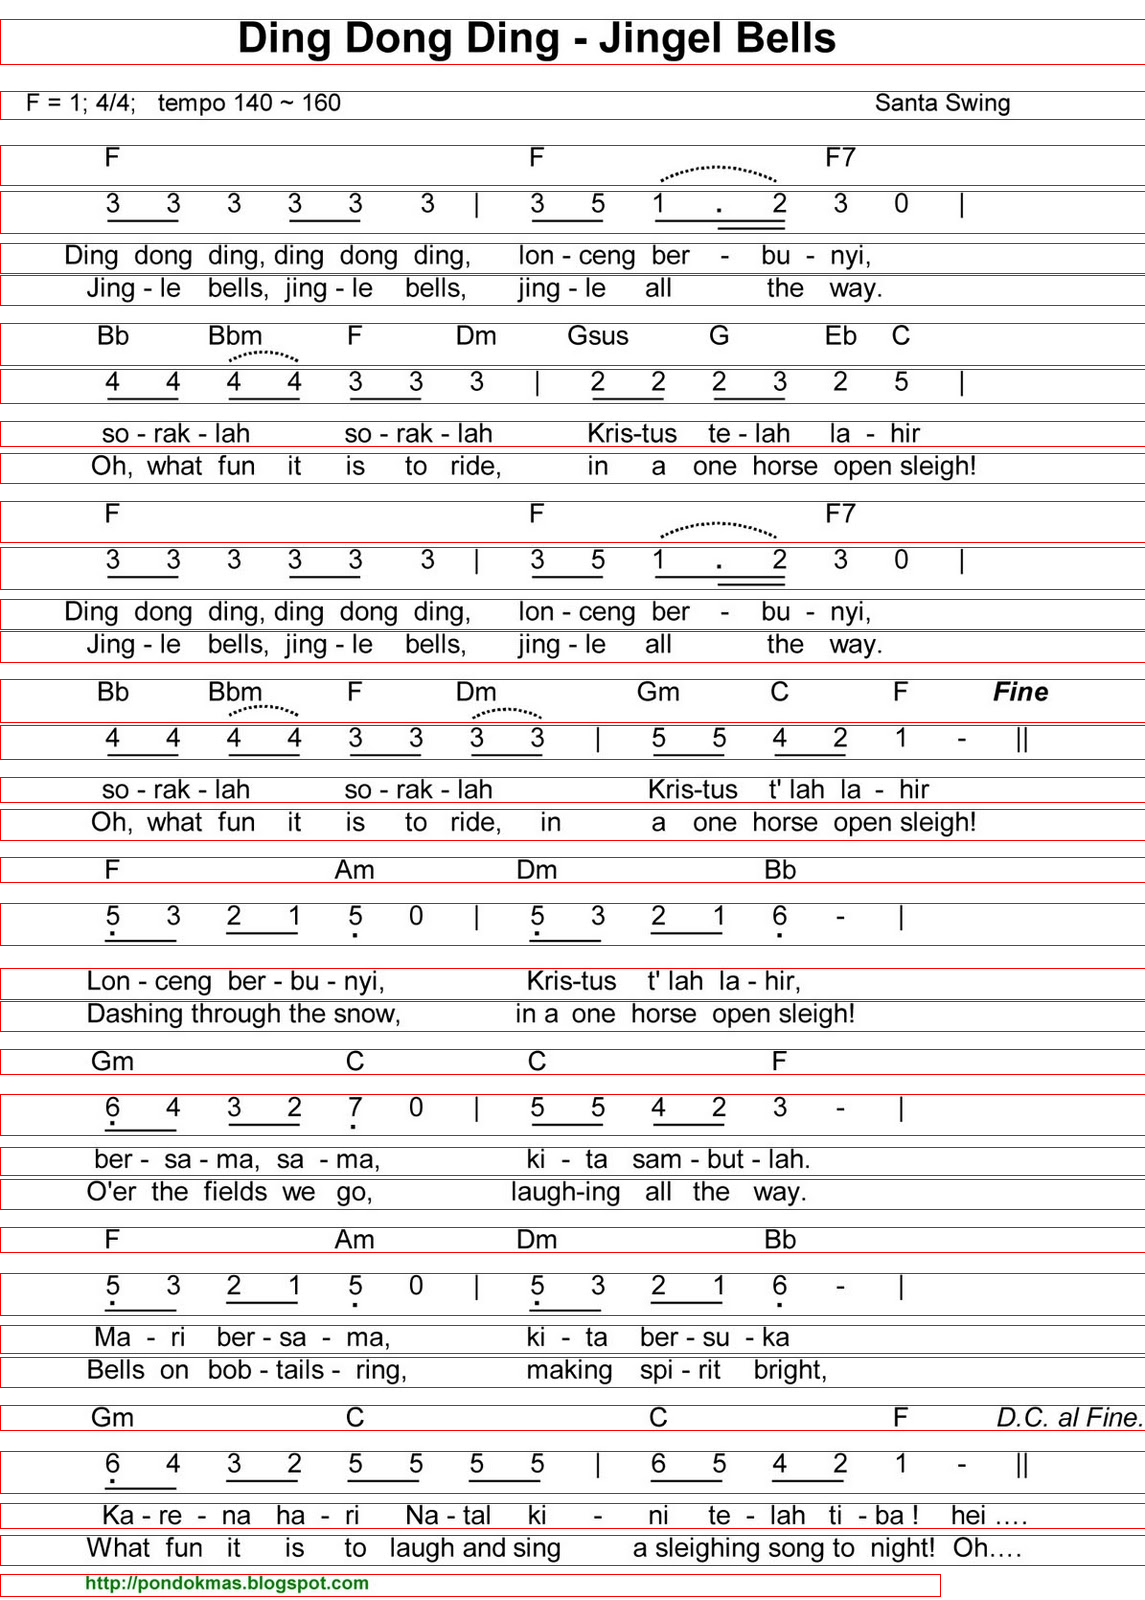

In [ ]:
print('\nall output of segmented image:')
imshow(img_segmented)

## try ocr

In [ ]:
# !sudo apt install tesseract-ocr
# !pip install pytesseract

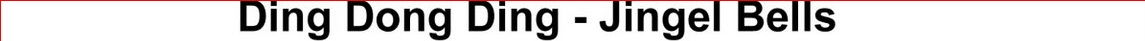

psm ke-6
Ding Dong Ding - Jingel Bells

psm ke-7
Ding Dong Ding - Jingel Bells



In [ ]:
import pytesseract

# Open the image
image = cv.imread('S_0.jpg')
imshow(image)
# print(image.shape)

# Extract the text from the image
for i in range(6,8):
  print('psm ke-'+str(i))
  conf = f'--psm {i}'
  text = pytesseract.image_to_string(image, config=conf)
  print(text)

## Blend 2 image for analysis

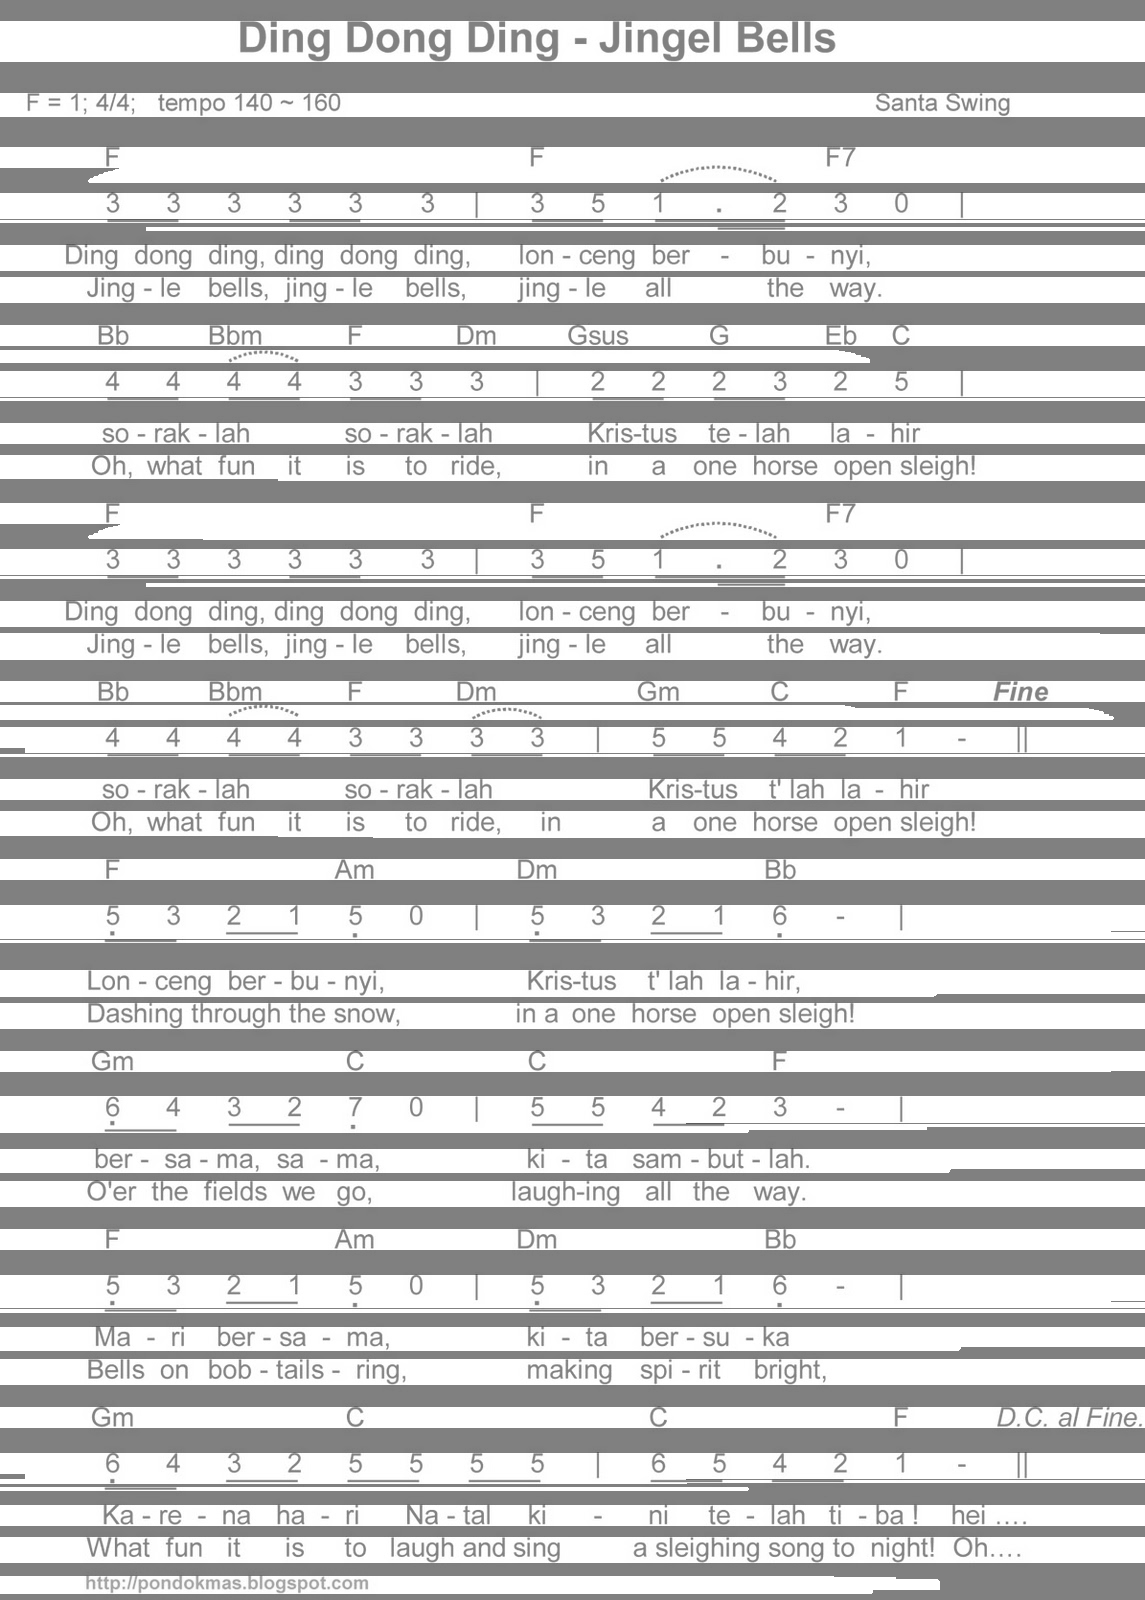

In [ ]:
temp = img.copy()
img_gray = cv.cvtColor(temp, cv.COLOR_BGR2GRAY)
ret, thresh2 = cv.threshold(img_gray, 150, 255, cv.THRESH_BINARY_INV)
kernel = cv.getStructuringElement(cv.MORPH_RECT, (img.shape[1],2))
mask = cv.morphologyEx(thresh2, cv.MORPH_DILATE, kernel)

src1 = mask
src2 = img_gray.copy()

alpha = 0.5
beta = (1.0 - alpha)
dst = cv.addWeighted(src1, alpha, src2, beta, 0.0)
imshow(dst)